In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [58]:
csv_file = 'logisticdata.csv'

In [127]:
csv_data = pd.read_csv(csv_file)

In [128]:
csv_data.head()

,value,category
0,1.24,I
1,2.79,F
2,2.03,F
3,1.65,I
4,1.32,F


In [129]:
csv_data.shape

(52, 2)

In [62]:
ccategory = []
for x in datafile['category']:
    if x == 'F':
        ccategory.append(1)
    else:
        ccategory.append(0)

In [130]:
csv_data['c_category'] = ccategory

In [131]:
csv_data.head()

,value,category,c_category
0,1.24,I,0
1,2.79,F,1
2,2.03,F,1
3,1.65,I,0
4,1.32,F,1


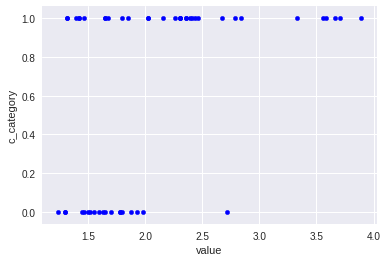

In [132]:
plt.figure("data_plot")
csv_data.plot(kind="scatter", x='value', y="c_category", color="blue")
plt.show()

In [133]:
data = pd.DataFrame(csv_data.drop(['category', 'c_category'], axis=1))

In [134]:
data.head()

,value
0,1.24
1,2.79
2,2.03
3,1.65
4,1.32


In [135]:
target = pd.DataFrame(csv_data.drop(['value', 'category'], axis=1))

In [136]:
target.head()

,c_category
0,0
1,1
2,1
3,0
4,1


In [117]:
classifier = LogisticRegression()

In [137]:
X_train, X_test,y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

In [138]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (34, 1)
X_test (18, 1)
y_train (34, 1)
y_test (18, 1)


In [146]:
classifier.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [147]:
print('train accuracy: %4.4f' % classifier.score(X_train, y_train))
print('test accuracy: %4.4f' % classifier.score(X_test, y_test))

train accuracy: 0.6176
test accuracy: 0.5556


In [154]:
from sklearn.model_selection import KFold

In [196]:
kfold = KFold(n_splits=8)

In [197]:
cvs = cross_val_score(classifier, data, target.values.ravel(), cv=kfold)

In [198]:
k = 1
for score in cvs:
    print ('k =', k, ', model accuracy: %4.4f' % score)
    k += 1

k = 1 , model accuracy: 0.8571
k = 2 , model accuracy: 0.5714
k = 3 , model accuracy: 0.5714
k = 4 , model accuracy: 0.7143
k = 5 , model accuracy: 0.5000
k = 6 , model accuracy: 0.8333
k = 7 , model accuracy: 0.6667
k = 8 , model accuracy: 0.6667
